# Zonal and annual means of the zonal wind stress

Russell, J. L., Kamenkovich, I., Bitz, C., Ferrari, R., Gille, S. T., Goodman, P. J., et al. (2018). Metrics for the evaluation of the Southern Ocean in coupled climate models and earth system models. Journal of Geophysical Research: Oceans, 123, 3120- 3143. https://doi.org/10.1002/2017JC013461

## Theory

The strength, extent, and latitudinal position of the Southern Hemisphere surface westerlies are crucial to the simulation of the circulation, vertical exchange and overturning, and heat and carbon fluxes over the Southern Ocean. The net transfer of wind energy to the ocean depends critically on the strength and latitudinal structure of the winds.


### Todo

- Add observation proxy comparison (CFSR)

## Setup

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client
client = Client()

## Inputs

In [2]:
session = cc.database.create_session()
start_time='1950-01-01'

In [3]:
expts = ['01deg_jra55_SAMextr_1011_from9091']

## Calculation

Computing the zonal mean by applying the operation `.mean(dim='xu_ocean')` is not correct. The error is particularly prominent in regions north of 65N, where the model uses the tripolar. The example here focusses in the Southern Hemisphere and thus we can get away by simply `.mean(dim='xu_ocean')`.

In [4]:
tau_x = cc.querying.getvar('01deg_jra55_SAMextr_1011_from9091', 'tau_x', session, start_time=start_time)
#tau_y = cc.querying.getvar('01deg_jra55_SAMextr_1011_from9091', 'tau_y', session, start_time=start_time)

In [5]:
mean_tau_x = tau_x.sel(yu_ocean=slice(None,-30)).mean('time')
#mean_tau_y = tau_y.sel(yu_ocean=slice(None,-30)).mean('time')

In [6]:
#tau = np.sqrt(mean_tau_x**2 + mean_tau_y**2)
tau = mean_tau_x
tau = tau.compute()
tau.name= expts[0]

## Plot

Text(0.5, 1.0, '01deg_jra55_SAMextr_1011_from9091')

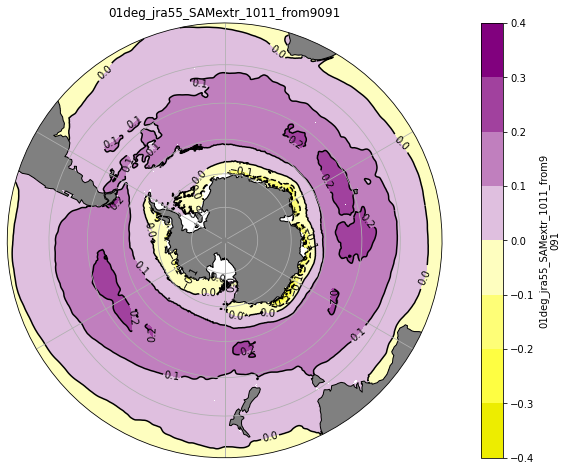

In [7]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath
import numpy as np
import matplotlib as mpl

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_title(expts[0])

ax.coastlines()
ax.gridlines()
ax.add_feature(cartopy.feature.LAND, facecolor='gray')

# Use colors from Russel et al, 2018
rgb_colors = np.array([
                 [237.6, 237.6, 0.], 
                 [255, 255, 66.4], 
                 [255, 255, 119.6],
                 [255, 255, 191.8], 
                 [223.8, 191.8, 223.8],
                 [192.8, 127.5, 190.8],
                 [161.6, 65.3, 158.6], 
                 [129.5, 1.0, 126.5]]) / 256.0

cmap = mpl.colors.ListedColormap(rgb_colors)
bounds = np.linspace(-0.4, 0.4, 9) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
tau.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm);

# Add contours
CS = tau.plot.contour(ax=ax, 
                      transform=ccrs.PlateCarree(), 
                      levels=np.linspace(-0.4, 0.4, 9), 
                      colors='black');
ax.clabel(CS, CS.levels, inline=True, fontsize=10)